In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import pywt
import matplotlib.pyplot as plt

In [4]:
#ls

#first automatize oder auch danach und dann f r g b do udn auch atomatize for better handeling

In [6]:
forest = Image.open('wald.jpg')
rgb_forest = forest.convert('RGB')

In [1]:
rgb_forest

NameError: name 'rgb_forest' is not defined

In [8]:
#forest

In [11]:
#rgb_forest ?

In [10]:
forest.shape

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [12]:
rgb_forest.shape

AttributeError: 'Image' object has no attribute 'shape'

In [22]:
r, g, b = rgb_forest.getpixel((1,1))

print(r, g, b)

255 255 255


In [23]:
pixels_forest = list(forest.getdata())

In [26]:
len(pixels_forest)

14155776

In [27]:
data_forest = np.asarray(forest)

In [29]:
shape=data_forest.shape

In [30]:
shape[0]*shape[1]*shape[2]

42467328

In [31]:
#42 million records

In [32]:
shape[0]*shape[1]

14155776

In [34]:
#14 million touples!
#we can safe storage capacity i hope
#forest
#maybe not handiest pict bcs not much edges but try

In [48]:
data_forest[:,0].shape

(4608, 3)

In [47]:
data_forest[0,:].shape

(3072, 3)

In [44]:
data_forest.shape

(4608, 3072, 3)

In [ ]:
#4*3 arrays?!

In [53]:
hor, vert = pywt.dwt(data_forest, 'db1') #eventuell haar

In [55]:
#Image.fromarray(hor, 'RGB')

In [ ]:
Image.fromarray(vert, 'RGB')

In [56]:
vert.shape

(4608, 3072, 2)

In [58]:
#entw forest  r g b values plotting
#oder von vert und horiz
#welche 2 sind in der 3. dimension? in original waruen es (SW) nur  die SW values

In [ ]:
#decompose to 3 matrixes then coeffs2 = pywt.dwt2(original, 'bior1.3')
#was ist dwt statt dwt2?

In [59]:
#das obige für r g b eizeln machen(?)

In [60]:
r = data_forest[:,:,0]
g = data_forest[:,:,1]
b = data_forest[:,:,2]

In [64]:
r.shape==g.shape==b.shape

True

In [66]:
#Image.fromarray(r) #geeeeeht

In [112]:
coeff_r = pywt.dwt2(r, 'bior1.3')
coeff_g = pywt.dwt2(g, 'bior1.3')
coeff_b = pywt.dwt2(b, 'bior1.3')

In [74]:
np.ndim(coeff[0][1])

1

In [108]:
len(coeff)

2

In [101]:
np.ndim(coeff)
np.ndim(coeff[0])
np.ndim(coeff[1])

3

In [113]:
LL_r, (LH_r, HL_r, HH_r) = coeff_r
print(LH_r.shape)
print(HL_r.shape)
print(HH_r.shape)
print(LL_r.shape)

(2306, 1538)
(2306, 1538)
(2306, 1538)
(2306, 1538)


In [114]:
LL_g, (LH_g, HL_g, HH_g) = coeff_g
LL_b, (LH_b, HL_b, HH_b) = coeff_b

In [115]:
print(np.count_nonzero(LL_r)) #alles automatisieren fct und alles in var speichern zum calc
print(np.count_nonzero(LH_r))
print(np.count_nonzero(HL_r))
print(np.count_nonzero(HH_r))

3546628
3364352
3356207
3087088


In [116]:
LL_r_del = pywt.threshold(LL_r, 0.001, mode='greater', substitute=0)
np.count_nonzero(LL_r_del)

3546243

In [117]:
LH_r_del = pywt.threshold(LH_r, 0.001, mode='greater', substitute=0)
np.count_nonzero(LH_r_del) 

1680299

In [118]:
HL_r_del = pywt.threshold(HL_r, 0.001, mode='greater', substitute=0)
np.count_nonzero(HL_r_del)  

1673144

In [119]:
HH_r_del = pywt.threshold(HH_r, 0.001, mode='greater', substitute=0)
np.count_nonzero(HH_r_del) 

1486346

In [ ]:
#delete bestimmte

In [111]:
#why declutter wenn dann eh coeffs2 nutze?
#alle 4 auch plottön`?
#function!

In [ ]:
#invert_try=pywt.idwt2(coeffs2, 'bior1.3')
#interpol nearest?

In [124]:
r_inv=pywt.idwt2((LL_r_del,(LH_r_del,HL_r_del,HH_r_del)), 'bior1.3') #was ist bior

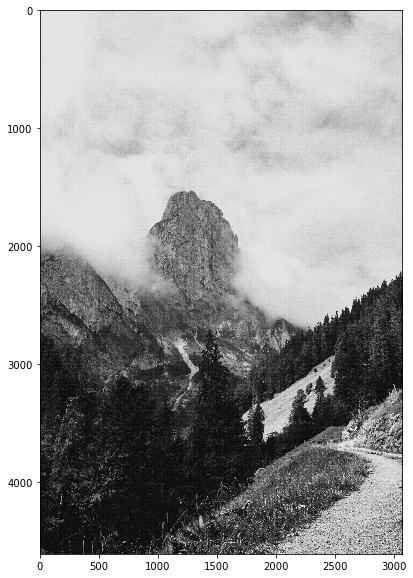

In [130]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(r_inv,interpolation='nearest',cmap=plt.cm.gray);

In [126]:
#irgendwas added mehr pixel meinte h
r_inv.shape
#saven?
#vorher war:
#(4608, 3072) -selbes?

(4608, 3072)

In [ ]:
#g,b machen, zusammen addieren und gucken oder sooo imshow auch oben machen?! ff
#kantigere bilder und kanten visu. 
#vielleicht nicht cmap gray weil es ja bunt is
#original mit implot

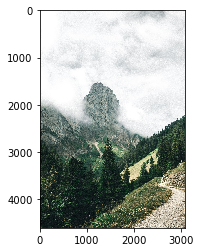

In [127]:
#exporteiren und was ist nearest?
plt.imshow(forest,interpolation='nearest',cmap=plt.cm.gray); #dieses gray gibt trozdem bunte bilda

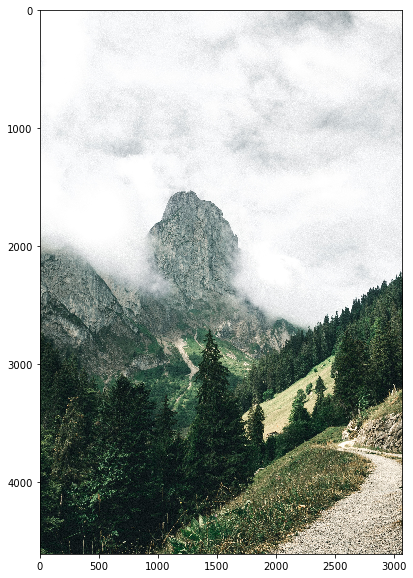

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(forest,interpolation='nearest',cmap=plt.cm.gray);